Initial transformer LR: 5e-07
Max transformer LR: 5e-05
Final transformer LR: 5.0000000000000004e-08
Warmup steps: 100 (10.0% of total steps)
Total steps: 1000
div_factor: 100
final_div_factor: 1000


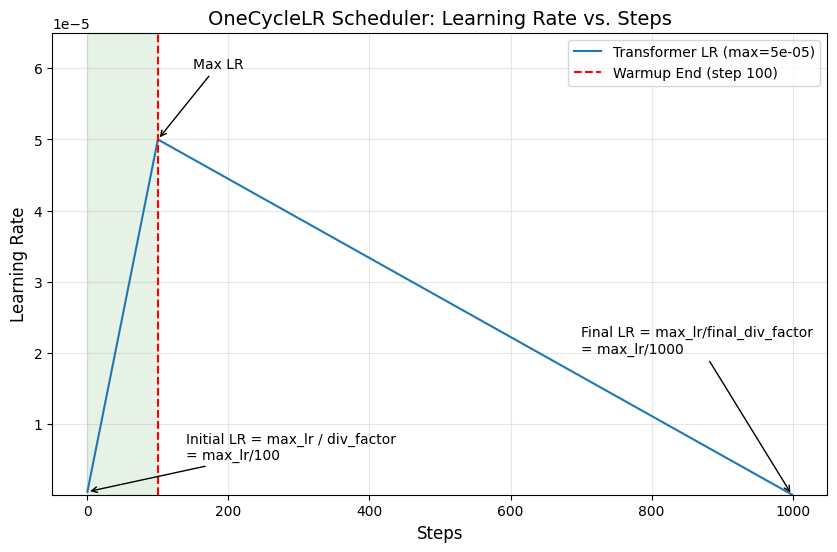

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters from the code snippet
total_steps = 1000  # Example value for total_steps
warmup_steps = total_steps // 10
transformer_lr = 5e-5  # Example value for demonstration
div_factor = 100
final_div_factor = 1000
anneal_strategy = "linear"

# Calculate the learning rate at each step
def calculate_lr(step, max_lr, total_steps, warmup_steps, div_factor, final_div_factor):
    initial_lr = max_lr / div_factor
    min_lr = max_lr / final_div_factor
    
    if step < warmup_steps:
        # Warmup phase - linear increase from initial_lr to max_lr
        return initial_lr + (max_lr - initial_lr) * (step / warmup_steps)
    else:
        # Annealing phase - linear decrease from max_lr to min_lr
        pct = (step - warmup_steps) / (total_steps - warmup_steps)
        return max_lr - (max_lr - min_lr) * pct

# Generate the learning rate curve for both transformer and classifier
steps = np.arange(0, total_steps)
transformer_lrs = [calculate_lr(step, transformer_lr, total_steps, warmup_steps, div_factor, final_div_factor) for step in steps]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot the learning rate curves
plt.plot(steps, transformer_lrs, label=f'Transformer LR (max={transformer_lr})')

# Mark the warmup phase
plt.axvline(x=warmup_steps, color='r', linestyle='--', label=f'Warmup End (step {warmup_steps})')

# Annotate the initial, max, and final learning rates
plt.annotate(f'Initial LR = max_lr / div_factor\n= max_lr/{div_factor}', 
             xy=(0, transformer_lr/div_factor), 
             xytext=(140, transformer_lr/div_factor*10),
             arrowprops=dict(arrowstyle='->'))

plt.annotate(f'Max LR', 
             xy=(warmup_steps, transformer_lr), 
             xytext=(warmup_steps+50, transformer_lr*1.2),
             arrowprops=dict(arrowstyle='->'))

plt.annotate(f'Final LR = max_lr/final_div_factor\n= max_lr/{final_div_factor}', 
             xy=(total_steps-1, transformer_lr/final_div_factor), 
             xytext=(total_steps-300, transformer_lr/final_div_factor*400),
             arrowprops=dict(arrowstyle='->'))

# Add grid, title and labels
plt.grid(True, alpha=0.3)
plt.title('OneCycleLR Scheduler: Learning Rate vs. Steps', fontsize=14)
plt.xlabel('Steps', fontsize=12)
plt.ylabel('Learning Rate', fontsize=12)
plt.legend()

# Show the warmup region
plt.axvspan(0, warmup_steps, alpha=0.1, color='green', label='Warmup Phase')

# To visualize the div_factor and final_div_factor impact
y_min = min(transformer_lrs) * 0.8
y_max = max(transformer_lrs) * 1.3
plt.ylim(y_min, y_max)

# Print some key values to verify
print(f"Initial transformer LR: {transformer_lr/div_factor}")
print(f"Max transformer LR: {transformer_lr}")
print(f"Final transformer LR: {transformer_lr/final_div_factor}")
print(f"Warmup steps: {warmup_steps} ({warmup_steps/total_steps*100:.1f}% of total steps)")
print(f"Total steps: {total_steps}")
print(f"div_factor: {div_factor}")
print(f"final_div_factor: {final_div_factor}")